In [ ]:
from owslib.wms import WebMapService

url = 'https://gis.unep-wcmc.org/arcgis/services/marine/WCMC_008_CoralReefs_WMS/MapServer/WMSServer?request=GetCapabilities&service=WMS'


wms = WebMapService(url)

In [ ]:
bbox=wms['0'].boundingBox
bbox

In [ ]:
img = wms.getmap(layers=['0'],
                 srs=wms['0'].crsOptions[1],
                 bbox=wms['0'].boundingBox,
                 size=(500, 500),
                 format='image/tiff',
                )

out = open('coral_reef.tiff', 'wb')
out.write(img.read())
out.close()

import rasterio
import rasterio.plot

raster = rasterio.open('coral_reef.tiff')

rasterio.plot.show(raster)



C:\Users\MATHEW~1.BID\AppData\Local\Temp\8/ipykernel_5400/2577193562.py:62: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(True)
C:\Users\Mathew.Biddle\programs\Anaconda3\envs\sandbox\lib\site-packages\cartopy\crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Mathew.Biddle\programs\Anaconda3\envs\sandbox\lib\site-packages\cartopy\crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Mathew.Biddle\programs\Anaconda3\envs\sandbox\lib\site-package

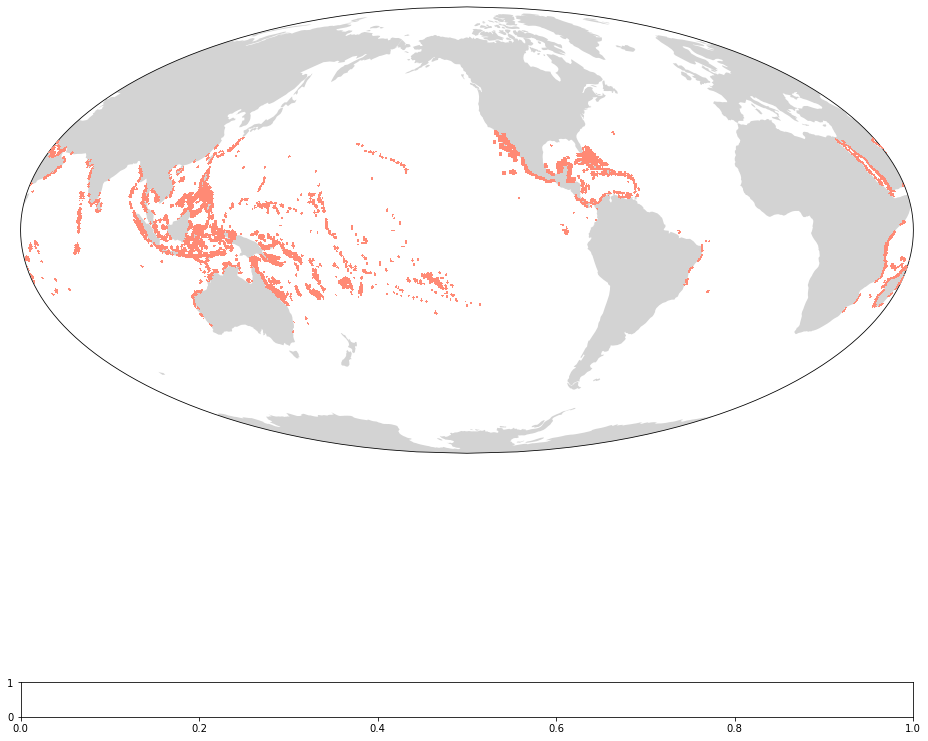

In [3]:
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

norm = mpl.colors.Normalize(vmin=1, vmax=1000)

projection=gcrs.Mollweide(central_longitude=-130)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world = world.dissolve()

fig, ax = plt.subplots(figsize=(16,16), facecolor=None, subplot_kw={'projection':projection})



geoplot.polyplot(
    world.dissolve(),
    facecolor='lightgray',
    edgecolor=None,
    projection=projection,
    ax=ax,
)

#rasterio.plot.show(raster, ax=ax)

# geoplot.polyplot(
#     gdf_dist,
#     #figsize=(16,8),
#     facecolor='black',
#     edgecolor=None,
#     projection=projection,
#     ax=ax,
# )

# geoplot.polyplot(
#     gdf_creef,
#     #figsize=(16,8),
#     facecolor='black',
#     edgecolor=None,
#     projection=projection,
#     ax=ax,
# )

cax = fig.add_axes([0.125, 0.08, 0.775, 0.03])


ax.add_wms(wms='https://gis.unep-wcmc.org/arcgis/services/marine/WCMC_008_CoralReefs_WMS/MapServer/WMSServer?request=GetCapabilities&service=WMS',
          layers=['0','1'],
          zorder=10,
          #wms_kwargs={'bbox':[-179.999935, -34.29823, 179.999936, 32.514818]},
          )

ax.set_global(); 

extent = [-118.290176  ,   -83.88697, 14.708445  ,   32.44238333]

#ax.set_extent(extent)

ax.outline_patch.set_visible(True)

# import matplotlib.ticker as mticker

# gl = ax.gridlines(draw_labels=True)
# gl.ylocator = mticker.FixedLocator(range(-30,31,10))

In [ ]:
import cartopy
url='https://gis.unep-wcmc.org/arcgis/services/marine/WCMC_008_CoralReefs_WMS/MapServer/WMSServer?request=GetCapabilities&service=WMS'
bbox = [-179.999935, -34.29823, 179.999936, 32.514818]
test = cartopy.io.ogc_clients.WMSRasterSource(service=url,layers=['0','1'],getmap_extra_kwargs={'bbox':bbox})

In [ ]:
#test.fetch_raster(projection=projection,extent=bbox,target_resolution=(300,300))

In [ ]:
l['bbox']